In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
bot_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"].isna())]
bot_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21204,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,0.000000,14539.0,14394.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21205,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,1.000317,12298.0,1410.0,1.0,0.0,...,1.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21207,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,2.000500,12407.0,1940.0,1.0,4.0,...,1.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21208,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,3.001083,13568.0,3872.0,2.0,10.0,...,5.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21210,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,4.001583,9439.0,1674.0,3.0,21.0,...,34.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281212,KR_6376052132,Red,anonymous 108,kr,Zeri,16.004633,10855.0,10570.0,11.0,132.0,...,13.0,262.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281215,KR_6376052132,Red,anonymous 108,kr,Zeri,17.005067,6243.0,4393.0,12.0,150.0,...,13.0,476.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281219,KR_6376052132,Red,anonymous 108,kr,Zeri,18.005333,5891.0,7120.0,12.0,164.0,...,13.0,498.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281222,KR_6376052132,Red,anonymous 108,kr,Zeri,19.005367,3717.0,4336.0,12.0,178.0,...,402.0,498.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM


Champions' winrates

In [4]:
profiling_df = bot_deaths_df[(bot_deaths_df["victory"] == True)].copy()

In [5]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [6]:
profiling_df = bot_deaths_df[(bot_deaths_df["victory"] == False)].copy()

In [7]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

,win rate,matches
champion,,
Caitlyn,0.56,200.0
Varus,0.48,117.0
Ezreal,0.53,111.0
Zeri,0.57,101.0
Xayah,0.59,91.0
Draven,0.45,86.0
Sivir,0.55,71.0
Kaisa,0.54,59.0
Lucian,0.42,50.0


In [8]:
print("This dataset contains {} matches in which the bot died at least once".format(len(np.unique(bot_deaths_df["gameId"]))))

This dataset contains 1080 matches in which the bot died at least once


In [9]:
print("{} players died a total of {} times".format(len(np.unique(bot_deaths_df["summoner"])), bot_deaths_df.shape[0]))

25 players died a total of 30017 times


In [10]:
print("This Dataset contains an average of {} deaths per game".format((bot_deaths_df.shape[0]/len(np.unique(bot_deaths_df["gameId"])))))

This Dataset contains an average of 27.793518518518518 deaths per game


In [11]:
blueSide_bot_deaths_df = bot_deaths_df[bot_deaths_df["team"] == "Blue"]
blueSide_bot_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21417,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,0.000000,194.0,457.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21418,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,1.000033,11464.0,3565.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21419,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,2.000250,12708.0,2564.0,1.0,4.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21421,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,3.000667,13486.0,2223.0,2.0,13.0,...,0.0,8.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21423,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,4.000967,11049.0,1690.0,2.0,14.0,...,0.0,40.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281168,KR_6375949760,Blue,anonymous 107,kr,Zeri,14.003767,11088.0,1205.0,8.0,108.0,...,211.0,453.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281169,KR_6375949760,Blue,anonymous 107,kr,Zeri,15.004033,11683.0,1305.0,9.0,113.0,...,211.0,603.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281172,KR_6375949760,Blue,anonymous 107,kr,Zeri,16.004217,7476.0,6145.0,9.0,118.0,...,211.0,630.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281173,KR_6375949760,Blue,anonymous 107,kr,Zeri,17.004600,8022.0,7597.0,9.0,126.0,...,211.0,732.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [12]:
gamesBlueSide = len(np.unique(blueSide_bot_deaths_df["gameId"]))
gamesBlueSide

481

In [13]:
players_df = np.unique(blueSide_bot_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_bot_deaths_df[blueSide_bot_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 100 played 20 matches
anonymous 101 played 22 matches
anonymous 103 played 20 matches
anonymous 104 played 20 matches
anonymous 105 played 16 matches
anonymous 106 played 29 matches
anonymous 107 played 19 matches
anonymous 108 played 12 matches
anonymous 82 played 17 matches
anonymous 83 played 11 matches
anonymous 84 played 28 matches
anonymous 85 played 23 matches
anonymous 86 played 22 matches
anonymous 87 played 19 matches
anonymous 88 played 15 matches
anonymous 89 played 46 matches
anonymous 90 played 19 matches
anonymous 91 played 16 matches
anonymous 92 played 7 matches
anonymous 93 played 26 matches
anonymous 94 played 8 matches
anonymous 95 played 8 matches
anonymous 97 played 11 matches
anonymous 98 played 16 matches
anonymous 99 played 31 matches


In [14]:
print("Blue side contains {} matches in which the bot died at least once".format(len(np.unique(blueSide_bot_deaths_df["gameId"]))))

Blue side contains 481 matches in which the bot died at least once


In [15]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_bot_deaths_df["summoner"])), blueSide_bot_deaths_df.shape[0]))

25 players died a total of 12853 times on the blue side


In [16]:
redSide_bot_deaths_df = bot_deaths_df[bot_deaths_df["team"] == "Red"]
redSide_bot_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21204,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,0.000000,14539.0,14394.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21205,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,1.000317,12298.0,1410.0,1.0,0.0,...,1.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21207,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,2.000500,12407.0,1940.0,1.0,4.0,...,1.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21208,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,3.001083,13568.0,3872.0,2.0,10.0,...,5.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21210,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,4.001583,9439.0,1674.0,3.0,21.0,...,34.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281212,KR_6376052132,Red,anonymous 108,kr,Zeri,16.004633,10855.0,10570.0,11.0,132.0,...,13.0,262.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281215,KR_6376052132,Red,anonymous 108,kr,Zeri,17.005067,6243.0,4393.0,12.0,150.0,...,13.0,476.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281219,KR_6376052132,Red,anonymous 108,kr,Zeri,18.005333,5891.0,7120.0,12.0,164.0,...,13.0,498.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281222,KR_6376052132,Red,anonymous 108,kr,Zeri,19.005367,3717.0,4336.0,12.0,178.0,...,402.0,498.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [17]:
gamesRedSide = len(np.unique(redSide_bot_deaths_df["gameId"]))
gamesRedSide

638

In [18]:
players_df = np.unique(redSide_bot_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_bot_deaths_df[redSide_bot_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 100 played 31 matches
anonymous 101 played 31 matches
anonymous 103 played 18 matches
anonymous 104 played 29 matches
anonymous 105 played 17 matches
anonymous 106 played 43 matches
anonymous 107 played 29 matches
anonymous 108 played 19 matches
anonymous 82 played 19 matches
anonymous 83 played 14 matches
anonymous 84 played 33 matches
anonymous 85 played 47 matches
anonymous 86 played 26 matches
anonymous 87 played 26 matches
anonymous 88 played 23 matches
anonymous 89 played 75 matches
anonymous 90 played 32 matches
anonymous 91 played 8 matches
anonymous 92 played 15 matches
anonymous 93 played 21 matches
anonymous 94 played 9 matches
anonymous 95 played 16 matches
anonymous 97 played 8 matches
anonymous 98 played 21 matches
anonymous 99 played 28 matches


In [19]:
print("Red side contains {} matches in which the bot died at least once".format(len(np.unique(redSide_bot_deaths_df["gameId"]))))

Red side contains 638 matches in which the bot died at least once


In [20]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_bot_deaths_df["summoner"])), redSide_bot_deaths_df.shape[0]))

25 players died a total of 17164 times on the red side


function to visualize the results

In [21]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Top Players' locations in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Top Players' locations in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [22]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [23]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [24]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [25]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [26]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Clustering Red Team Victory

In [27]:
redSideVictory_df = bot_deaths_df[(bot_deaths_df["team"] == "Red") & (bot_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21261,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,0.000000,14539.0,14394.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21262,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,1.000283,11815.0,3968.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21263,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,2.000817,12648.0,2287.0,1.0,2.0,...,0.0,6.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21265,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,3.001233,13059.0,3310.0,2.0,13.0,...,0.0,13.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21267,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,4.001383,13811.0,4090.0,3.0,20.0,...,0.0,13.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281212,KR_6376052132,Red,anonymous 108,kr,Zeri,16.004633,10855.0,10570.0,11.0,132.0,...,13.0,262.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281215,KR_6376052132,Red,anonymous 108,kr,Zeri,17.005067,6243.0,4393.0,12.0,150.0,...,13.0,476.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281219,KR_6376052132,Red,anonymous 108,kr,Zeri,18.005333,5891.0,7120.0,12.0,164.0,...,13.0,498.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281222,KR_6376052132,Red,anonymous 108,kr,Zeri,19.005367,3717.0,4336.0,12.0,178.0,...,402.0,498.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [28]:
profiling_df = bot_deaths_df[(bot_deaths_df["team"] == "Red") & (bot_deaths_df["victory"] == True)].copy()

In [29]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [30]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

53.29153605015674

In [31]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_bot_deaths_df.shape[0]) * 100
winRateRedSide

51.8352365415987

In [32]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 won 12 matches on the red side
anonymous 100 has an average of 23.0 deaths per game when winning on the red side

anonymous 101 won 20 matches on the red side
anonymous 101 has an average of 23.85 deaths per game when winning on the red side

anonymous 103 won 7 matches on the red side
anonymous 103 has an average of 25.0 deaths per game when winning on the red side

anonymous 104 won 19 matches on the red side
anonymous 104 has an average of 25.05263157894737 deaths per game when winning on the red side

anonymous 105 won 11 matches on the red side
anonymous 105 has an average of 27.363636363636363 deaths per game when winning on the red side

anonymous 106 won 20 matches on the red side
anonymous 106 has an average of 27.4 deaths per game when winning on the red side

anonymous 107 won 12 matches on the red side
anonymous 107 has an average of 22.916666666666668 deaths per game when winning on the red side

anonymous 108 won 9 matches on the red side
anonymous 108 has a

In [33]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 340 matches in which the jungler died at least once
25 players died a total of 8897 times on the red side
Victory games on red side contains an average of 26.16764705882353 deaths per game


In [34]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
21261,14539.0,14394.0,0.000000
21262,11815.0,3968.0,1.000283
21263,12648.0,2287.0,2.000817
21265,13059.0,3310.0,3.001233
21267,13811.0,4090.0,4.001383
...,...,...,...
281212,10855.0,10570.0,16.004633
281215,6243.0,4393.0,17.005067
281219,5891.0,7120.0,18.005333
281222,3717.0,4336.0,19.005367


Time discretization

In [35]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].apply(float)
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [36]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [37]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [38]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [39]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
21261,1.245082,2.103643,-1
21262,0.503237,-0.557131,-1
21263,0.730093,-0.986132,-1
21265,0.842024,-0.725057,-1
21267,1.046821,-0.525996,-1
...,...,...,...
281212,0.241794,1.127737,0
281215,-1.014223,-0.448669,0
281219,-1.110085,0.247277,0
281222,-1.702145,-0.463216,0


In [40]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.436440201231179
Silhouette score for k=3: 0.533338798485494
Silhouette score for k=4: 0.5191608379176799
Silhouette score for k=5: 0.5081485021497084
Silhouette score for k=6: 0.5002526933492029
Silhouette score for k=7: 0.39949524998581837
Silhouette score for k=8: 0.40881049763533844
Silhouette score for k=9: 0.42332288227270204
Silhouette score for k=10: 0.44251730783982496
Silhouette score for k=11: 0.4401501122482043
Silhouette score for k=12: 0.4290465114488449
Silhouette score for k=13: 0.43027111318072697
Silhouette score for k=14: 0.4349694875290606
Silhouette score for k=15: 0.42099684124601305
Silhouette score for k=16: 0.42870012335401
Silhouette score for k=17: 0.43184791755523755
Silhouette score for k=18: 0.4335356561104637
Silhouette score for k=19: 0.42653137014996173
Silhouette score for k=20: 0.4375101740832423
Silhouette score for k=25: 0.44638194276951665


K-Means with k = 3

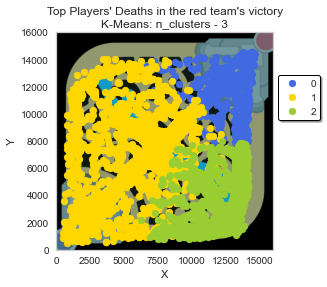

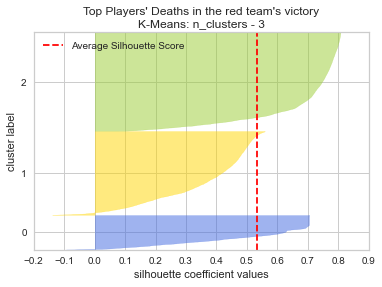

Silhouette score: 0.533338798485494
2    4034
1    3444
0    1419
Name: cluster, dtype: int64

Inertia: 7095.238590180477

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,13253.437632,12506.515856,-0.591261
1,1,6030.681185,6983.538328,0.148955
2,2,12171.901587,3204.759048,-0.933069


In [41]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [42]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1567.466749,1945.001683,0.618559
1,1,2493.483984,2812.587152,0.591899
2,2,1294.323118,1515.968262,0.258676


In [43]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14589.0,6022.0,14582.0,7286.0,1,-1
1,1,12913.0,505.0,14050.0,521.0,1,-1
2,2,14134.0,6246.0,8024.0,767.0,1,-1


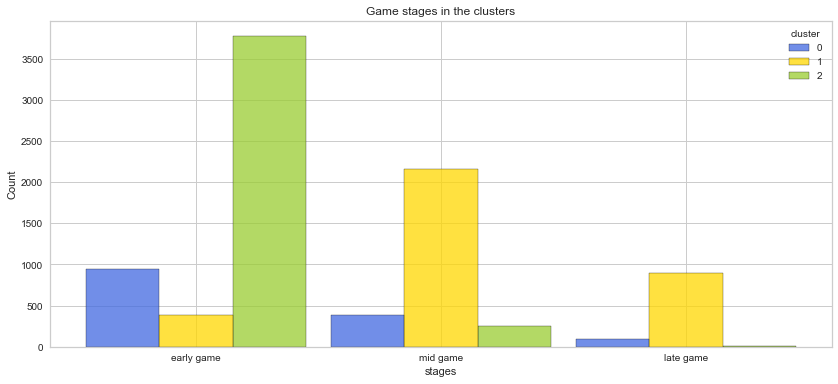

In [44]:
stagesPerClusterV2(redSideVictory_df, colors)

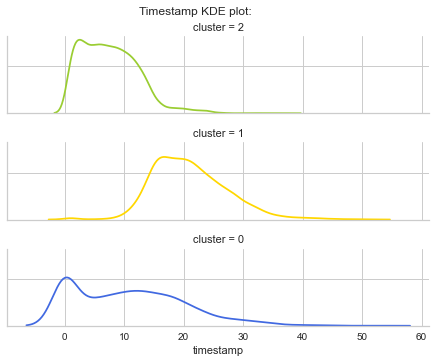

In [45]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 4

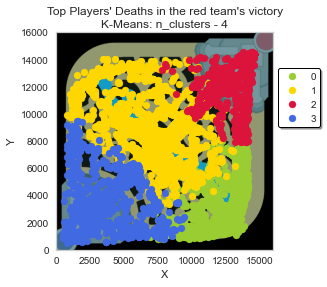

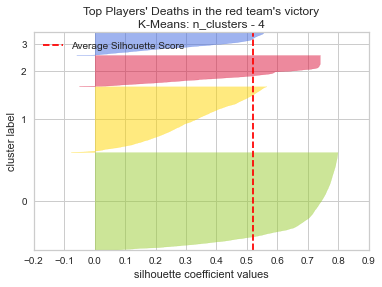

Silhouette score: 0.5191608379176799
0    4008
1    2698
2    1277
3     914
Name: cluster, dtype: int64

Inertia: 5420.788779320402

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,12190.686876,3191.468313,-0.937625
1,1,7134.635285,8291.715345,0.038176
2,2,13591.149569,12727.519186,-0.660141
3,3,3514.582057,3622.051422,0.446389


In [47]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "crimson", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [48]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1279.109826,1503.946092,0.249953
1,1,2070.492280,1969.605813,0.581742
2,2,1186.955060,1865.149749,0.579269
3,3,2024.751255,2113.682528,0.518660


In [49]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14134.0,6246.0,8024.0,767.0,1,-1
1,1,13248.0,832.0,14050.0,3404.0,1,-1
2,2,14589.0,7800.0,14582.0,7903.0,1,-1
3,3,9419.0,505.0,9447.0,521.0,1,-1


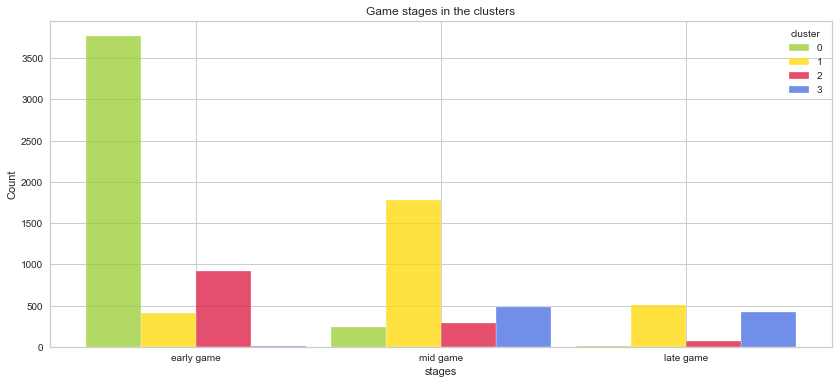

In [50]:
stagesPerClusterV2(redSideVictory_df, colors)

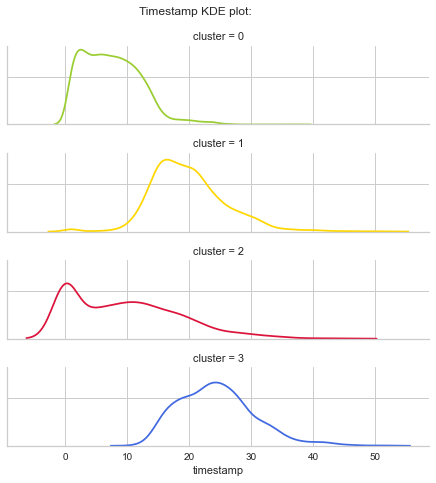

In [51]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [52]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Caitlyn,70
Zeri,34
Ezreal,33
Varus,31
Draven,27
Xayah,24
Sivir,24
Kaisa,19
Jhin,15
Lucian,13


Deaths with each champion:

In [53]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Caitlyn     1884
Zeri         902
Ezreal       861
Varus        786
Xayah        691
Draven       664
Sivir        626
Kaisa        494
Jhin         373
Lucian       334
Aphelios     317
Jinx         231
Kalista      147
Samira       135
Ziggs        122
Tristana     114
Vayne         64
Twitch        49
Nilah         47
Jayce         33
Ashe          23
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [54]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 21 champions when they won on the red side

Cluster 0 - died with 21 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jayce' 'Jhin' 'Jinx'
 'Kaisa' 'Kalista' 'Lucian' 'Nilah' 'Samira' 'Sivir' 'Tristana' 'Twitch'
 'Varus' 'Vayne' 'Xayah' 'Zeri' 'Ziggs']
Caitlyn     771
Zeri        417
Ezreal      406
Varus       364
Sivir       298
Draven      295
Xayah       280
Kaisa       236
Jhin        181
Aphelios    142
Lucian      140
Jinx         90
Kalista      73
Tristana     68
Ziggs        65
Samira       63
Vayne        37
Twitch       27
Nilah        23
Jayce        18
Ashe         14
Name: champion, dtype: int64

Cluster 1 - died with 21 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jayce' 'Jhin' 'Jinx'
 'Kaisa' 'Kalista' 'Lucian' 'Nilah' 'Samira' 'Sivir' 'Tristana' 'Twitch'
 'Varus' 'Vayne' 'Xayah' 'Zeri' 'Ziggs']
Caitlyn     635
Zeri        270
Ezreal      269
Xayah       241
Varus       229
Draven      185
Sivir       174
Kaisa     

---
### Clustering Red Team Defeat

In [62]:
redSideDefeat_df = bot_deaths_df[(bot_deaths_df["team"] == "Red") & (bot_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21204,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,0.000000,14539.0,14394.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21205,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,1.000317,12298.0,1410.0,1.0,0.0,...,1.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21207,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,2.000500,12407.0,1940.0,1.0,4.0,...,1.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21208,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,3.001083,13568.0,3872.0,2.0,10.0,...,5.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21210,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,4.001583,9439.0,1674.0,3.0,21.0,...,34.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280780,KR_6375985152,Red,anonymous 100,kr,Draven,19.005517,12054.0,10648.0,10.0,131.0,...,0.0,316.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
280781,KR_6375985152,Red,anonymous 100,kr,Draven,20.005650,5939.0,13983.0,11.0,147.0,...,0.0,316.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
280783,KR_6375985152,Red,anonymous 100,kr,Draven,21.006150,9570.0,9562.0,12.0,153.0,...,0.0,316.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
280786,KR_6375985152,Red,anonymous 100,kr,Draven,22.006333,13026.0,2535.0,12.0,157.0,...,0.0,368.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [56]:
profiling_df = bot_deaths_df[(bot_deaths_df["team"] == "Red") & (bot_deaths_df["victory"] == False)].copy()

In [57]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_bot_deaths_df.shape[0]) * 100
winRateRedSide

48.1647634584013

In [58]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 lost 19 matches on the red side
anonymous 100 has an average of 27.31578947368421 deaths per game when losing on the red side

anonymous 101 lost 11 matches on the red side
anonymous 101 has an average of 25.363636363636363 deaths per game when losing on the red side

anonymous 103 lost 11 matches on the red side
anonymous 103 has an average of 27.636363636363637 deaths per game when losing on the red side

anonymous 104 lost 10 matches on the red side
anonymous 104 has an average of 31.4 deaths per game when losing on the red side

anonymous 105 lost 6 matches on the red side
anonymous 105 has an average of 27.0 deaths per game when losing on the red side

anonymous 106 lost 23 matches on the red side
anonymous 106 has an average of 26.26086956521739 deaths per game when losing on the red side

anonymous 107 lost 17 matches on the red side
anonymous 107 has an average of 26.58823529411765 deaths per game when losing on the red side

anonymous 108 lost 10 matches on the r

In [59]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 298 matches in which the jungler died at least once
25 players died a total of 8267 times on the red side
Defeat games on red side contains an average of 27.741610738255034 deaths per game


In [63]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
21204,14539.0,14394.0,0.000000
21205,12298.0,1410.0,1.000317
21207,12407.0,1940.0,2.000500
21208,13568.0,3872.0,3.001083
21210,9439.0,1674.0,4.001583
...,...,...,...
280780,12054.0,10648.0,19.005517
280781,5939.0,13983.0,20.005650
280783,9570.0,9562.0,21.006150
280786,13026.0,2535.0,22.006333


Time discretization

In [64]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].apply(float)
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [65]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [66]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [67]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [68]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
21204,1.233197,1.803499,-1
21205,0.451696,-1.416455,-1
21207,0.489707,-1.285018,-1
21208,0.894582,-0.805894,-1
21210,-0.545320,-1.350985,-1
...,...,...,...
280780,0.366606,0.874513,0
280781,-1.765871,1.701573,0
280783,-0.499636,0.605192,0
280786,0.705571,-1.137462,0


In [69]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.44915798612390073
Silhouette score for k=3: 0.5199830341823333
Silhouette score for k=4: 0.48543330773627186
Silhouette score for k=5: 0.4750876020081704
Silhouette score for k=6: 0.3636165468965355
Silhouette score for k=7: 0.3805899748754697
Silhouette score for k=8: 0.3950057464582128
Silhouette score for k=9: 0.373742956944474
Silhouette score for k=10: 0.39191717789709857
Silhouette score for k=11: 0.40466802641641375
Silhouette score for k=12: 0.4120823874593401
Silhouette score for k=13: 0.4182527798465455
Silhouette score for k=14: 0.4206652556019509
Silhouette score for k=15: 0.40230378465526
Silhouette score for k=16: 0.4135144224421354
Silhouette score for k=17: 0.42656772865469783
Silhouette score for k=18: 0.4190781311652846
Silhouette score for k=19: 0.4170219647348119
Silhouette score for k=20: 0.4323522042771009
Silhouette score for k=25: 0.4359919294969946


K-Means with k = 3

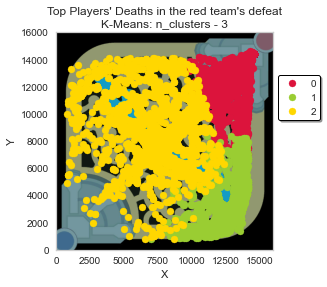

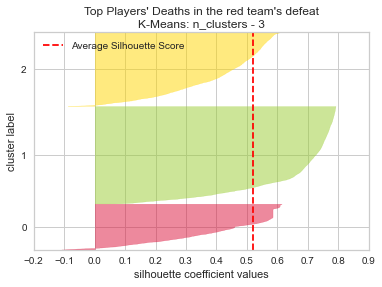

Silhouette score: 0.5199830341823333
1    3721
2    2795
0    1751
Name: cluster, dtype: int64

Inertia: 6602.449559575683

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,13300.121074,12333.565391,-0.237007
1,1,12452.851653,3496.358506,-0.912120
2,2,7632.932021,8682.885868,0.194991


In [71]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [72]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1221.339343,2019.467462,0.765714
1,1,1163.224001,1609.873077,0.304169
2,2,2030.765011,2266.242435,0.593564


In [73]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14589.0,9343.0,14601.0,6406.0,1,-1
1,1,14144.0,7002.0,8850.0,758.0,1,-1
2,2,12379.0,807.0,14139.0,758.0,1,-1


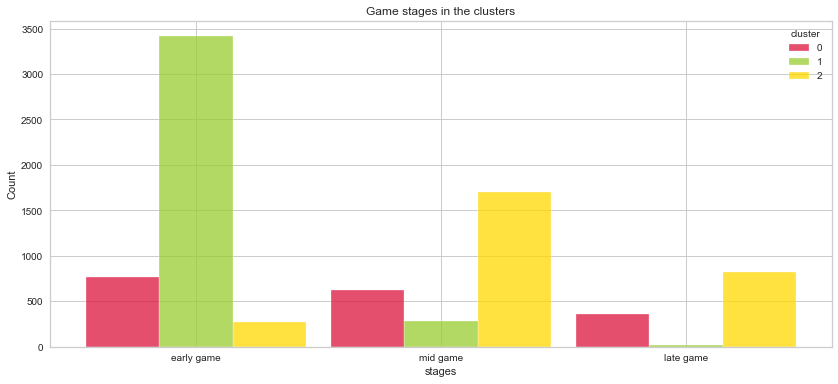

In [74]:
stagesPerClusterV2(redSideDefeat_df, colors)

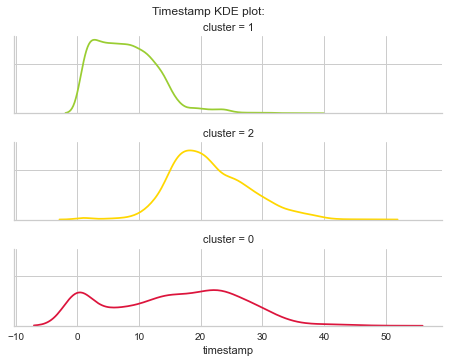

In [75]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [76]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Caitlyn,53
Varus,35
Draven,28
Ezreal,28
Zeri,21
Lucian,19
Xayah,19
Sivir,17
Jhin,15
Kaisa,14


Deaths with each champion:

In [77]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Caitlyn     1416
Varus       1000
Ezreal       835
Draven       769
Zeri         583
Xayah        521
Lucian       508
Sivir        437
Jhin         429
Kaisa        393
Kalista      282
Jinx         257
Samira       172
Aphelios     149
Ziggs        120
Tristana     106
Ashe         105
Nilah         90
Twitch        38
Rumble        32
Karthus       25
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [78]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 21 champions when they won on the red side

Cluster 0 - died with 21 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Karthus' 'Lucian' 'Nilah' 'Rumble' 'Samira' 'Sivir' 'Tristana'
 'Twitch' 'Varus' 'Xayah' 'Zeri' 'Ziggs']
Caitlyn     301
Varus       213
Ezreal      164
Draven      156
Zeri        133
Xayah       119
Lucian      116
Sivir        97
Kaisa        85
Jhin         83
Kalista      62
Jinx         61
Aphelios     33
Samira       33
Tristana     21
Ashe         20
Ziggs        18
Nilah        17
Twitch        7
Rumble        6
Karthus       6
Name: champion, dtype: int64

Cluster 1 - died with 21 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Karthus' 'Lucian' 'Nilah' 'Rumble' 'Samira' 'Sivir' 'Tristana'
 'Twitch' 'Varus' 'Xayah' 'Zeri' 'Ziggs']
Caitlyn     646
Varus       440
Draven      354
Ezreal      353
Zeri        255
Lucian      245
Xayah       226
Sivi

---
### Clustering Blue Team Victory

In [79]:
blueSideVictory_df = bot_deaths_df[(bot_deaths_df["team"] == "Blue") & (bot_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21567,EUW1_6273948263,Blue,anonymous 84,euw1,Caitlyn,0.000000,194.0,457.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21568,EUW1_6273948263,Blue,anonymous 84,euw1,Caitlyn,1.000350,11246.0,1453.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21569,EUW1_6273948263,Blue,anonymous 84,euw1,Caitlyn,2.000900,12140.0,2245.0,1.0,4.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21571,EUW1_6273948263,Blue,anonymous 84,euw1,Caitlyn,3.001450,7667.0,1316.0,2.0,11.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21572,EUW1_6273948263,Blue,anonymous 84,euw1,Caitlyn,4.001800,10868.0,1614.0,3.0,20.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281020,KR_6375966263,Blue,anonymous 105,kr,Ezreal,25.006600,11893.0,9135.0,14.0,203.0,...,440.0,155.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281022,KR_6375966263,Blue,anonymous 105,kr,Ezreal,26.006900,12370.0,11332.0,14.0,207.0,...,500.0,155.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281025,KR_6375966263,Blue,anonymous 105,kr,Ezreal,27.007050,3476.0,3768.0,14.0,208.0,...,500.0,155.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281026,KR_6375966263,Blue,anonymous 105,kr,Ezreal,28.007333,11976.0,11904.0,15.0,214.0,...,500.0,155.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [80]:
profiling_df = bot_deaths_df[(bot_deaths_df["team"] == "Blue") & (bot_deaths_df["victory"] == True)].copy()

In [81]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [82]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

50.935550935550935

In [83]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_bot_deaths_df.shape[0]) * 100
winRateBlueSide

50.081692989963436

In [84]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 won 8 matches on the blue side
anonymous 100 has an average of 26.0 deaths per game when winning on the blue side

anonymous 101 won 12 matches on the blue side
anonymous 101 has an average of 26.416666666666668 deaths per game when winning on the blue side

anonymous 103 won 11 matches on the blue side
anonymous 103 has an average of 27.181818181818183 deaths per game when winning on the blue side

anonymous 104 won 14 matches on the blue side
anonymous 104 has an average of 26.142857142857142 deaths per game when winning on the blue side

anonymous 105 won 7 matches on the blue side
anonymous 105 has an average of 22.285714285714285 deaths per game when winning on the blue side

anonymous 106 won 15 matches on the blue side
anonymous 106 has an average of 26.266666666666666 deaths per game when winning on the blue side

anonymous 107 won 11 matches on the blue side
anonymous 107 has an average of 23.818181818181817 deaths per game when winning on the blue side

anonymou

In [85]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 245 matches in which the jungler died at least once
25 players died a total of 6437 times on the blue side
Victory games on blue side contains an average of 26.273469387755103 deaths per game


In [86]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
21567,194.0,457.0,0.000000
21568,11246.0,1453.0,1.000350
21569,12140.0,2245.0,2.000900
21571,7667.0,1316.0,3.001450
21572,10868.0,1614.0,4.001800
...,...,...,...
281020,11893.0,9135.0,25.006600
281022,12370.0,11332.0,26.006900
281025,3476.0,3768.0,27.007050
281026,11976.0,11904.0,28.007333


Time discretization

In [87]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].apply(float)
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [88]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [89]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [90]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [91]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
21567,-2.243980,-1.212119,-1
21568,0.605125,-0.939733,-1
21569,0.835591,-0.723137,-1
21571,-0.317508,-0.977199,-1
21572,0.507681,-0.895702,-1
...,...,...,...
281020,0.771916,1.161140,1
281022,0.894882,1.761975,1
281025,-1.397910,-0.306627,1
281026,0.793313,1.918405,1


In [92]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.43675052837267736
Silhouette score for k=3: 0.5392064490043267
Silhouette score for k=4: 0.5243208143255411
Silhouette score for k=5: 0.5053347731843558
Silhouette score for k=6: 0.3955317206819335
Silhouette score for k=7: 0.3959327590946621
Silhouette score for k=8: 0.41446734305045824
Silhouette score for k=9: 0.4251138653437661
Silhouette score for k=10: 0.4180779822307542
Silhouette score for k=11: 0.4055079266594375
Silhouette score for k=12: 0.4300256500907963
Silhouette score for k=13: 0.4307899352358947
Silhouette score for k=14: 0.4307750761449525
Silhouette score for k=15: 0.407236234735358
Silhouette score for k=16: 0.4139030387509385
Silhouette score for k=17: 0.41164302548174037
Silhouette score for k=18: 0.4108310380544437
Silhouette score for k=19: 0.41701468287969534
Silhouette score for k=20: 0.4239168521212559
Silhouette score for k=25: 0.4457178859718954


K-Means with k = 3

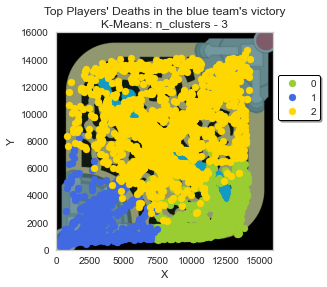

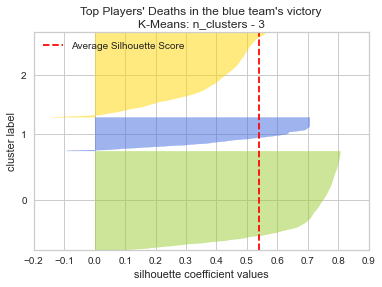

Silhouette score: 0.5392064490043267
0    2939
2    2502
1     996
Name: cluster, dtype: int64

Inertia: 5064.893304169967

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11703.904729,2678.471929,-0.942838
1,1,2312.634538,1611.469880,-0.585341
2,2,8225.200240,8790.868905,0.170264


In [94]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [95]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1545.042281,1288.323929,0.249120
1,1,2035.924412,1551.241319,0.609287
2,2,2700.876366,2500.124515,0.581306


In [96]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14122.0,6845.0,8030.0,733.0,1,-1
1,1,7421.0,130.0,8746.0,208.0,1,-1
2,2,14266.0,795.0,14672.0,2094.0,1,-1


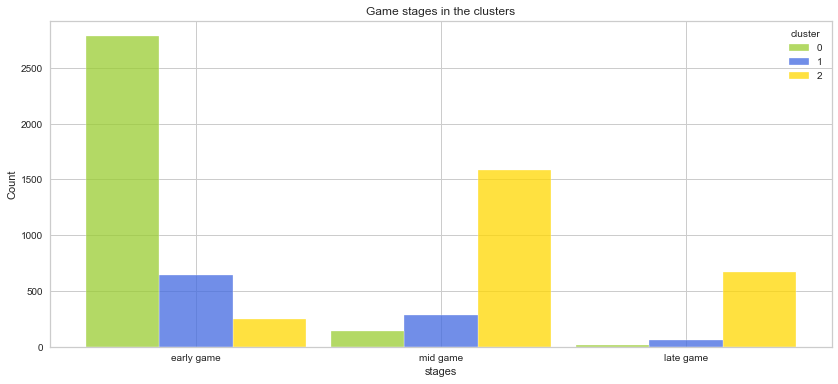

In [97]:
stagesPerClusterV2(blueSideVictory_df, colors)

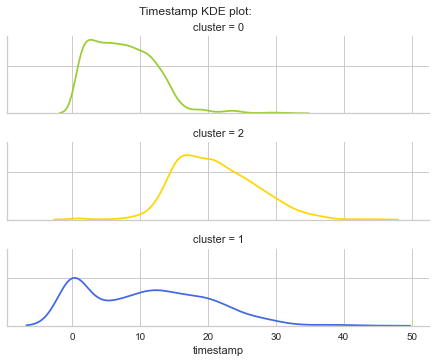

In [98]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 4

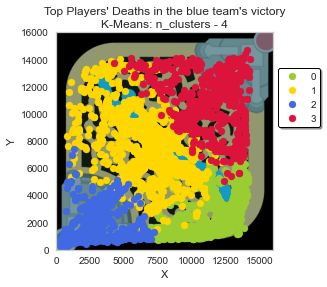

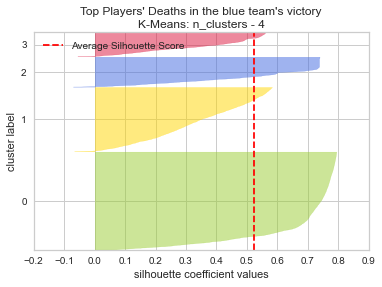

Silhouette score: 0.5243208143255411
0    2920
1    1919
2     893
3     705
Name: cluster, dtype: int64

Inertia: 3832.88183963771

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11721.703425,2657.164726,-0.947603
1,1,6908.233976,7629.146430,0.032830
2,2,2023.237402,1291.301232,-0.648376
3,3,11332.744681,11233.222695,0.503546


In [100]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [101]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1531.209942,1274.442758,0.237700
1,1,1857.520343,2055.698957,0.557731
2,2,1885.126088,1200.141591,0.573383
3,3,2047.544939,2076.647707,0.519467


In [102]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14122.0,6845.0,8030.0,733.0,1,-1
1,1,12144.0,795.0,14064.0,1536.0,1,-1
2,2,7213.0,130.0,7443.0,208.0,1,-1
3,3,14266.0,4276.0,14672.0,5061.0,1,-1


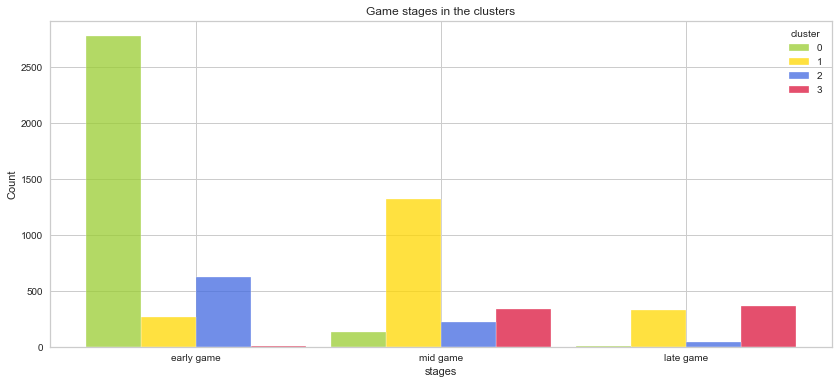

In [103]:
stagesPerClusterV2(blueSideVictory_df, colors)

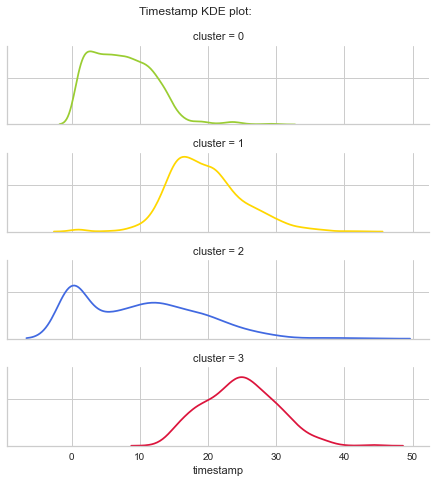

In [104]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [105]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Caitlyn,41
Xayah,30
Ezreal,26
Varus,25
Zeri,24
Sivir,15
Kaisa,13
Draven,12
Kalista,9
Samira,8


Deaths with each champion:

In [106]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Caitlyn        1074
Xayah           794
Ezreal          692
Zeri            638
Varus           594
Sivir           411
Draven          311
Kaisa           293
Kalista         251
Samira          230
Lucian          223
Jinx            221
Aphelios        162
Jhin            150
Ashe             97
Ziggs            85
MissFortune      58
Tristana         47
Vayne            46
Twitch           23
Karthus          20
Yasuo            17
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [107]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 22 champions when they won on the red side

Cluster 0 - died with 22 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Karthus' 'Lucian' 'MissFortune' 'Samira' 'Sivir' 'Tristana'
 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Yasuo' 'Zeri' 'Ziggs']
Caitlyn        453
Xayah          362
Ezreal         317
Zeri           293
Varus          292
Sivir          180
Kaisa          163
Draven         137
Kalista        109
Jinx           103
Samira          99
Lucian          99
Jhin            63
Aphelios        52
Ashe            45
Ziggs           35
Tristana        30
Vayne           29
MissFortune     25
Twitch          13
Yasuo           11
Karthus         10
Name: champion, dtype: int64

Cluster 1 - died with 22 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Karthus' 'Lucian' 'MissFortune' 'Samira' 'Sivir' 'Tristana'
 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Yasuo' 'Zeri' 'Ziggs']
Caitlyn 

---
### Clustering Blue Team Defeat

In [108]:
blueSideDefeat_df = bot_deaths_df[(bot_deaths_df["team"] == "Blue") & (bot_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21417,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,0.000000,194.0,457.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21418,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,1.000033,11464.0,3565.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21419,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,2.000250,12708.0,2564.0,1.0,4.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21421,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,3.000667,13486.0,2223.0,2.0,13.0,...,0.0,8.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21423,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,4.000967,11049.0,1690.0,2.0,14.0,...,0.0,40.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281168,KR_6375949760,Blue,anonymous 107,kr,Zeri,14.003767,11088.0,1205.0,8.0,108.0,...,211.0,453.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281169,KR_6375949760,Blue,anonymous 107,kr,Zeri,15.004033,11683.0,1305.0,9.0,113.0,...,211.0,603.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281172,KR_6375949760,Blue,anonymous 107,kr,Zeri,16.004217,7476.0,6145.0,9.0,118.0,...,211.0,630.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281173,KR_6375949760,Blue,anonymous 107,kr,Zeri,17.004600,8022.0,7597.0,9.0,126.0,...,211.0,732.0,False,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [109]:
profiling_df = bot_deaths_df[(bot_deaths_df["team"] == "Blue") & (bot_deaths_df["victory"] == False)].copy()

In [110]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_bot_deaths_df.shape[0]) * 100
winRateBlueSide

49.918307010036564

In [111]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 lost 12 matches on the blue side
anonymous 100 has an average of 27.416666666666668 deaths per game when losing on the blue side

anonymous 101 lost 10 matches on the blue side
anonymous 101 has an average of 27.3 deaths per game when losing on the blue side

anonymous 103 lost 9 matches on the blue side
anonymous 103 has an average of 31.555555555555557 deaths per game when losing on the blue side

anonymous 104 lost 6 matches on the blue side
anonymous 104 has an average of 26.166666666666668 deaths per game when losing on the blue side

anonymous 105 lost 9 matches on the blue side
anonymous 105 has an average of 22.88888888888889 deaths per game when losing on the blue side

anonymous 106 lost 14 matches on the blue side
anonymous 106 has an average of 27.0 deaths per game when losing on the blue side

anonymous 107 lost 8 matches on the blue side
anonymous 107 has an average of 28.75 deaths per game when losing on the blue side

anonymous 108 lost 5 matches on the bl

In [112]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 236 matches in which the jungler died at least once
25 players died a total of 6416 times on the blue side
Defeat games on blue side contains an average of 27.1864406779661 deaths per game


In [113]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
21417,194.0,457.0,0.000000
21418,11464.0,3565.0,1.000033
21419,12708.0,2564.0,2.000250
21421,13486.0,2223.0,3.000667
21423,11049.0,1690.0,4.000967
...,...,...,...
281168,11088.0,1205.0,14.003767
281169,11683.0,1305.0,15.004033
281172,7476.0,6145.0,16.004217
281173,8022.0,7597.0,17.004600


Time discretization

In [114]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].apply(float)
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [115]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [116]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [117]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [118]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
21417,-1.841737,-1.170372,-1
21418,0.905109,-0.081090,-1
21419,1.208310,-0.431917,-1
21421,1.397932,-0.551430,-1
21423,0.803960,-0.738234,-1
...,...,...,...
281168,0.813466,-0.908215,-1
281169,0.958486,-0.873168,0
281172,-0.066890,0.823140,0
281173,0.066187,1.332032,0


In [119]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.45303610883731515
Silhouette score for k=3: 0.527918872297739
Silhouette score for k=4: 0.4977279577693628
Silhouette score for k=5: 0.4908926008812381
Silhouette score for k=6: 0.38001223734374423
Silhouette score for k=7: 0.39166994470127675
Silhouette score for k=8: 0.3820840038123447
Silhouette score for k=9: 0.4014504503823293
Silhouette score for k=10: 0.40734589566300144
Silhouette score for k=11: 0.41059968031468885
Silhouette score for k=12: 0.4250795896973481
Silhouette score for k=13: 0.4266521036153877
Silhouette score for k=14: 0.43286041357161487
Silhouette score for k=15: 0.4397264755169603
Silhouette score for k=16: 0.41117907926354696
Silhouette score for k=17: 0.40537840627326804
Silhouette score for k=18: 0.40959935479218373
Silhouette score for k=19: 0.42169400738714574
Silhouette score for k=20: 0.4184408416626838
Silhouette score for k=25: 0.427651312106615


K-Means with k = 3

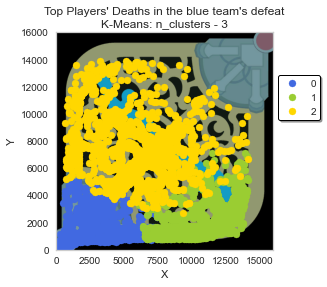

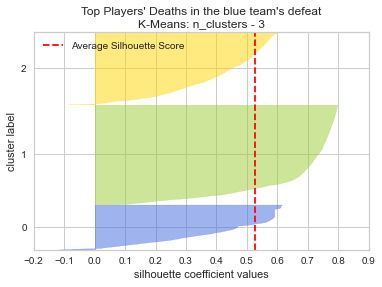

Silhouette score: 0.527918872297739
1    2956
2    2125
0    1335
Name: cluster, dtype: int64

Inertia: 5119.529430596128

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2339.805243,1477.993258,-0.220974
1,1,11385.173884,2400.549053,-0.908999
2,2,6093.464000,7194.528000,0.161882


In [121]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [122]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2049.586165,1213.890395,0.783640
1,1,1611.062520,1112.718554,0.313499
2,2,2249.761012,2073.123437,0.601298


In [123]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,8390.0,124.0,5043.0,158.0,1,-1
1,1,14115.0,6043.0,7121.0,759.0,1,-1
2,2,14096.0,700.0,13896.0,2717.0,1,-1


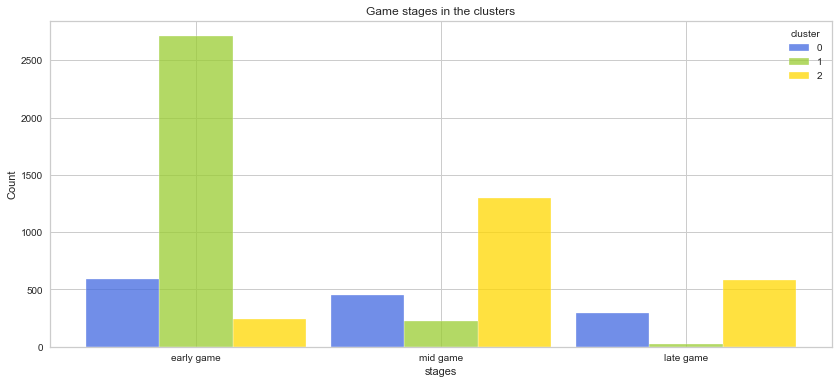

In [124]:
stagesPerClusterV2(blueSideDefeat_df, colors)

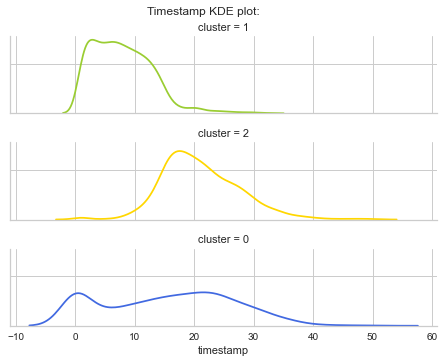

In [125]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [126]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Caitlyn,36
Varus,26
Ezreal,24
Zeri,22
Draven,19
Xayah,18
Sivir,15
Jhin,13
Kaisa,13
Lucian,10


Deaths with each champion:

In [127]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Caitlyn        992
Varus          732
Ezreal         653
Zeri           574
Draven         541
Xayah          432
Sivir          414
Jhin           397
Kaisa          328
Lucian         273
Samira         208
Tristana       170
Aphelios       131
MissFortune    123
Kalista        120
Vayne           65
Nilah           51
Jinx            47
Ziggs           45
Cassiopeia      34
Karthus         30
Ashe            29
Yasuo           27
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [128]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 23 champions when they won on the red side

Cluster 0 - died with 23 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Cassiopeia' 'Draven' 'Ezreal' 'Jhin' 'Jinx'
 'Kaisa' 'Kalista' 'Karthus' 'Lucian' 'MissFortune' 'Nilah' 'Samira'
 'Sivir' 'Tristana' 'Varus' 'Vayne' 'Xayah' 'Yasuo' 'Zeri' 'Ziggs']
Caitlyn        187
Varus          161
Ezreal         135
Draven         125
Zeri           105
Xayah           96
Sivir           84
Jhin            79
Kaisa           70
Lucian          64
Samira          50
Tristana        28
Aphelios        27
Kalista         26
MissFortune     23
Nilah           18
Vayne           11
Ziggs           11
Cassiopeia       9
Jinx             9
Karthus          7
Yasuo            5
Ashe             5
Name: champion, dtype: int64

Cluster 1 - died with 23 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Cassiopeia' 'Draven' 'Ezreal' 'Jhin' 'Jinx'
 'Kaisa' 'Kalista' 'Karthus' 'Lucian' 'MissFortune' 'Nilah' 'Samira'
 'Sivir' 'Tristana' 'Varus' 'Vayn

---

### Blue Win Rate vs Red Win Rate

In [129]:
wins_df = bot_deaths_df[bot_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21261,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,0.000000,14539.0,14394.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21262,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,1.000283,11815.0,3968.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21263,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,2.000817,12648.0,2287.0,1.0,2.0,...,0.0,6.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21265,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,3.001233,13059.0,3310.0,2.0,13.0,...,0.0,13.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
21267,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,4.001383,13811.0,4090.0,3.0,20.0,...,0.0,13.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281212,KR_6376052132,Red,anonymous 108,kr,Zeri,16.004633,10855.0,10570.0,11.0,132.0,...,13.0,262.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281215,KR_6376052132,Red,anonymous 108,kr,Zeri,17.005067,6243.0,4393.0,12.0,150.0,...,13.0,476.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281219,KR_6376052132,Red,anonymous 108,kr,Zeri,18.005333,5891.0,7120.0,12.0,164.0,...,13.0,498.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM
281222,KR_6376052132,Red,anonymous 108,kr,Zeri,19.005367,3717.0,4336.0,12.0,178.0,...,402.0,498.0,True,NaN,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [130]:
wins = len(np.unique(wins_df["gameId"]))
wins

585

In [131]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 58.119658119658126 vs Blue: 41.88034188034188


In [132]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 58.02139037433155 vs Blue: 41.97860962566845
